<a href="https://colab.research.google.com/github/Tkaheva/MO/blob/main/homework_practice_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Домашняя работа

**Задание среднего уровня** Примените градиентный спуск к задаче прогнозирования цен на недвижимость в Бостоне. Какого качества на валидации удалось достичь по r2-score? Сколько итераций  понадобилось?

РЕЗУЛЬТАТЫ ГРАДИЕНТНОГО СПУСКА
Качество на валидации (R²-score): 0.6013
MSE на валидации: 0.5441
Количество итераций: 555
Финальные веса модели: [ 2.06456048e+00  8.26724424e-01  1.20795273e-01 -2.72410108e-01
  3.17108095e-01 -1.90002551e-03 -3.10668612e-02 -8.88497904e-01
 -8.57207896e-01]


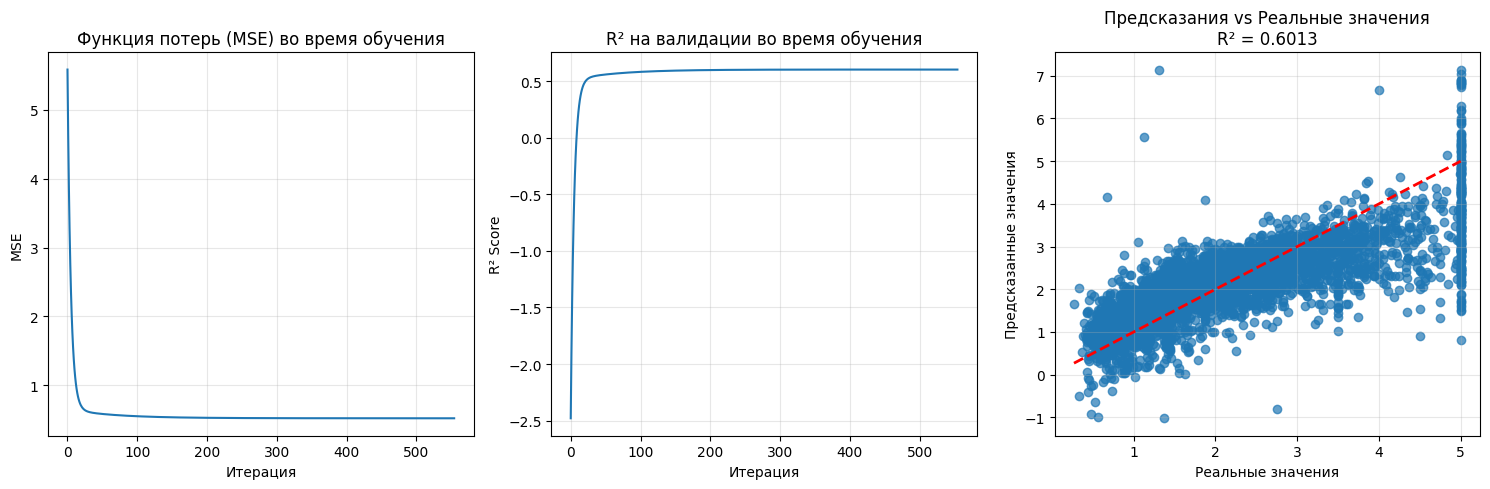


Сравнение с LinearRegression из sklearn:
R² sklearn: 0.6010
R² градиентный спуск: 0.6013
Разница: 0.000317

АНАЛИЗ СХОДИМОСТИ:
Начальная MSE: 5.5856
Финальная MSE: 0.5196
Улучшение: 5.0660


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Загрузка данных California housing
california_dataset = fetch_california_housing()
X = california_dataset.data
y = california_dataset.target

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Добавление столбца единиц для intercept
X_train_scaled = np.column_stack([np.ones(X_train_scaled.shape[0]), X_train_scaled])
X_test_scaled = np.column_stack([np.ones(X_test_scaled.shape[0]), X_test_scaled])

class GradientDescent:
    def __init__(self, learning_rate=0.01, max_iter=1000, tol=1e-4):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.loss_history = []
        self.r2_history = []

    def fit(self, X, y, X_val=None, y_val=None):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)

        for i in range(self.max_iter):
            # Прямое распространение (предсказания)
            y_pred = X.dot(self.weights)

            # Вычисление градиента
            gradient = (1 / n_samples) * X.T.dot(y_pred - y)

            # Обновление весов
            self.weights -= self.learning_rate * gradient

            # Вычисление потерь
            train_loss = mean_squared_error(y, y_pred)
            self.loss_history.append(train_loss)

            # Вычисление R² на валидации, если предоставлена
            if X_val is not None and y_val is not None:
                y_val_pred = X_val.dot(self.weights)
                val_r2 = r2_score(y_val, y_val_pred)
                self.r2_history.append(val_r2)

            # Проверка сходимости
            if i > 0 and abs(self.loss_history[-2] - self.loss_history[-1]) < self.tol:
                break

        return self

    def predict(self, X):
        return X.dot(self.weights)

# Обучение модели с градиентным спуском
gd = GradientDescent(learning_rate=0.1, max_iter=10000, tol=1e-6)
gd.fit(X_train_scaled, y_train, X_test_scaled, y_test)

# Предсказания на тестовой выборке
y_pred = gd.predict(X_test_scaled)

# Оценка качества
final_r2 = r2_score(y_test, y_pred)
final_mse = mean_squared_error(y_test, y_pred)
iterations_used = len(gd.loss_history)

print("="*60)
print("РЕЗУЛЬТАТЫ ГРАДИЕНТНОГО СПУСКА")
print("="*60)
print(f"Качество на валидации (R²-score): {final_r2:.4f}")
print(f"MSE на валидации: {final_mse:.4f}")
print(f"Количество итераций: {iterations_used}")
print(f"Финальные веса модели: {gd.weights}")

# Визуализация процесса обучения
plt.figure(figsize=(15, 5))

# График функции потерь
plt.subplot(1, 3, 1)
plt.plot(gd.loss_history)
plt.title('Функция потерь (MSE) во время обучения')
plt.xlabel('Итерация')
plt.ylabel('MSE')
plt.grid(True, alpha=0.3)

# График R² на валидации
plt.subplot(1, 3, 2)
if gd.r2_history:
    plt.plot(gd.r2_history)
    plt.title('R² на валидации во время обучения')
    plt.xlabel('Итерация')
    plt.ylabel('R² Score')
    plt.grid(True, alpha=0.3)

# График предсказаний vs реальные значения
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title(f'Предсказания vs Реальные значения\nR² = {final_r2:.4f}')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Сравнение с LinearRegression из sklearn для проверки
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
lr_r2 = r2_score(y_test, y_pred_lr)

print(f"\nСравнение с LinearRegression из sklearn:")
print(f"R² sklearn: {lr_r2:.4f}")
print(f"R² градиентный спуск: {final_r2:.4f}")
print(f"Разница: {abs(lr_r2 - final_r2):.6f}")

# Анализ сходимости
print(f"\nАНАЛИЗ СХОДИМОСТИ:")
print(f"Начальная MSE: {gd.loss_history[0]:.4f}")
print(f"Финальная MSE: {gd.loss_history[-1]:.4f}")
print(f"Улучшение: {gd.loss_history[0] - gd.loss_history[-1]:.4f}")

Вы можете начать использовать градиентный спуск уже сейчас! Если вы хотите глубже понять механизмы, которые использует этот приём - добро пожаловать в урок 5, где мы поговорим о математике, которая стоит за градиентным спуском и даже реализуем градиентный спуск на языке Python.